# Vegetable Classification

Data from: https://www.kaggle.com/competitions/digit-recognizer/data 

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense

In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# For competitions
! kaggle competitions download -c digit-recognizer

  0% 0.00/15.3M [00:00<?, ?B/s]
100% 15.3M/15.3M [00:00<00:00, 181MB/s]


In [5]:
# For datasets
# ! kaggle datasets download misrakahmed/vegetable-image-dataset

In [8]:
! ls
! sudo apt-get install unzip

digit-recognizer.zip  kaggle.json  sample_data
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [9]:
! unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [10]:
!ls

digit-recognizer.zip  kaggle.json  sample_data	sample_submission.csv  test.csv  train.csv


In [11]:
! pwd

/content


# Start going through data

In [15]:
df_train = pd.read_csv('train.csv')

In [17]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
X = np.array(df_train.iloc[:, 1:])
X = X/255.0
X = X.reshape(-1, 28, 28, 1)
y = np.array(df_train.iloc[:, :1])
y = y.reshape(len(y),)

print(X.shape)
print(y.shape)

print(X[0].shape)
print(y[0].shape)

(42000, 28, 28, 1)
(42000,)
(28, 28, 1)
()


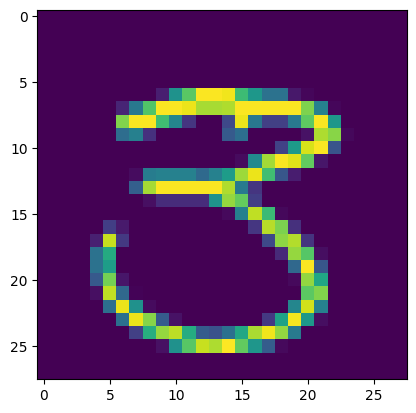

3


In [59]:
from matplotlib import pyplot as plt

id = 7

plt.imshow(X[id].reshape((28, 28)), interpolation='nearest')
plt.show()

print(y[id])

In [31]:
DIR = os.getcwd()
DAT_DIR = DIR + '/digi_img'
DAT_TRAIN = DAT_DIR + '/train/'
DAT_TEST = DAT_DIR + '/test/'
DAT_VAL = DAT_DIR + '/validation/'
MODEL_DIR = DAT_DIR + '/models/'

# Modelling

In [67]:
model = Sequential()

model.add(Conv2D(16, (5, 5), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(512))

model.add(Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])

model.fit(X, y, batch_size=64, epochs=5, validation_split=0.3)

Epoch 1/5
460/460 [==============================] - 56s 120ms/step - loss: 1.2110 - accuracy: 0.6839 - val_loss: 0.4596 - val_accuracy: 0.8406
Epoch 2/5
460/460 [==============================] - 54s 116ms/step - loss: 0.2491 - accuracy: 0.9235 - val_loss: 0.2381 - val_accuracy: 0.9217
Epoch 3/5
460/460 [==============================] - 52s 113ms/step - loss: 0.1599 - accuracy: 0.9517 - val_loss: 0.1291 - val_accuracy: 0.9632
Epoch 4/5
460/460 [==============================] - 56s 121ms/step - loss: 0.1227 - accuracy: 0.9633 - val_loss: 0.1024 - val_accuracy: 0.9702
Epoch 5/5
460/460 [==============================] - 53s 114ms/step - loss: 0.1019 - accuracy: 0.9682 - val_loss: 0.1302 - val_accuracy: 0.9582


# Make Predictions for Test Set

In [68]:
df_test = pd.read_csv('test.csv')

In [74]:
X_test = np.array(df_test.iloc[:,:])
X_test = X_test/255.0
X_test = X_test.reshape(-1, 28, 28, 1)

print(X_test.shape)

print(X_test[0].shape)

(28000, 28, 28, 1)
(28, 28, 1)


In [76]:
predictions = model.predict(X_test)

875/875 [==============================] - 13s 14ms/step


In [85]:
pred_array = np.array([np.argmax(i) for i in predictions])

In [87]:
pred_array[:10]

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3])

In [93]:
ids = np.array([i + 1 for i in range(len(pred_array))])

In [94]:
ids[:10]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
sub_df = pd.Data

In [95]:
# Create the pandas DataFrame
sub_df=pd.DataFrame({"ImageId":ids,
                      "Label":pred_array})

sub_df.to_csv('submission.csv', index=False)
sub_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
